In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from arch import arch_model

/Users/cwx/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Homework 7
### Cohort 1 Group 7

#### ARCH, GARCH, and Realized Variance
From Kenneth French’s web page, download the monthly and daily returns to the investment (CMA) factor from 19630701 to 20221231. CMA is the last factor in the FF 5-factor model. Using the monthly return data:

In [2]:
mdata = pd.read_csv("F-F_Research_Data_5_Factors_2x3.csv", skiprows=3)
mdata = mdata.rename(columns={'Unnamed: 0':'Date'})
mdata = mdata[(mdata['Date'] >= '196307') & (mdata['Date'] <= '202312')]
mdata['Date'] = pd.to_datetime(mdata['Date'],format="%Y%m")
mdata.iloc[:, 1:] = mdata.iloc[:, 1:].apply(pd.to_numeric)

In [3]:
ddata = pd.read_csv("F-F_Research_Data_5_Factors_2x3_daily.CSV", skiprows=3)
ddata = ddata.rename(columns={'Unnamed: 0':'Date'})
ddata = ddata[(ddata['Date'] >= 19630701) & (ddata['Date'] <= 20231229)]
ddata['Date'] = pd.to_datetime(ddata['Date'],format="%Y%m%d")
ddata.iloc[:, 1:] = ddata.iloc[:, 1:].apply(pd.to_numeric)


#### 1)
Estimate an ARMA(1,1) for the return series. Report the results. What is the estimated monthly persistence of expected returns to CMA? What is the half-life of the expected return series in months?

In [4]:
m1 = ARIMA(np.array(mdata["CMA"].fillna(0)), order=(1, 0, 1)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  726
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1552.745
Date:                Sun, 25 Feb 2024   AIC                           3113.490
Time:                        17:21:36   BIC                           3131.840
Sample:                             0   HQIC                          3120.571
                                - 726                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2724      0.096      2.829      0.005       0.084       0.461
ar.L1          0.4109      0.150      2.742      0.006       0.117       0.705
ma.L1         -0.2790      0.159     -1.757      0.079      -0.590       0.032
sigma2         4.2191      0.168     25.100      0.000       3.890       4.549
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                78.19
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.16
Prob(H) (two-sided):                  0.65   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
half_life = np.log(0.5) / np.log(m1.params[1])
print("Half-life:", np.round(half_life,4))

Half-life: 0.7794


Based on the ARIMA(1,0,1) model output, the estimated monthly persistence of expected returns to CMA is represented by the AR(1) coefficient of 0.4109, indicating moderate persistence of returns from one month to the next. The half-life of the expected return series, calculated from the provided output, is 0.7794 months, suggesting that it takes less than a month for the impact of a shock to the return series to decay by half. This reflects a relatively quick adjustment of the expected returns to new information.

#### 2）
Estimate an ARCH(12) and a GARCH(1,1) process for the residuals from this ARMA(1,1). Report the results and plot the time series of the conditional variance from each model on the same plot. Are the estimated variance processes stationary?

In [6]:
m2 = arch_model(np.array(mdata["CMA"].fillna(0)), vol='ARCH', p=12, q=0).fit(disp='off')
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1484.35
Distribution:                  Normal   AIC:                           2996.70
Method:            Maximum Likelihood   BIC:                           3060.92
                                        No. Observations:                  726
Date:                Sun, Feb 25 2024   Df Residuals:                      725
Time:                        17:21:36   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1831  6.937e-02      2.639  8.307e-03 [4.713e-02,  0.319]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.9698      0.248      3.914  9.078e-05      [  0.484,  1.455]
alpha[1]       0.1533  6.219e-02      2.466  1.368e-02    [3.145e-02,  0.275]
alpha[2]       0.1516  5.953e-02      2.546  1.090e-02    [3.488e-02,  0.268]
alpha[3]       0.0727  4.804e-02      1.512      0.130   [-2.151e-02,  0.167]
alpha[4]       0.0406  4.253e-02      0.955      0.339   [-4.273e-02,  0.124]
alpha[5]       0.0963  5.051e-02      1.907  5.650e-02   [-2.665e-03,  0.195]
alpha[6]       0.1287  5.267e-02      2.444  1.452e-02    [2.550e-02,  0.232]
alpha[7]       0.0000  4.484e-02      0.000      1.000 [-8.788e-02,8.788e-02]
alpha[8]   3.7390e-03  6.357e-02  5.882e-02      0.953      [ -0.121,  0.128]
alpha[9]       0.0466  4.852e-02      0.961      0.336   [-4.846e-02,  0.142]
alpha[10]  9.0913e-03  4.356e-02      0.209      0.835 [-7.629e-02,9.447e-02]
alpha[11]      0.0693  3.811e-02      1.820  6.883e-02   [-5.351e-03,  0.144]
alpha[12]      0.0159  4.202e-02      0.379      0.705 [-6.644e-02,9.827e-02]
=============================================================================

Covariance estimator: robust
"""

In [7]:
m3 = arch_model(np.array(mdata["CMA"].fillna(0)), vol='Garch', p=1, q=1).fit(disp='off')
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1486.54
Distribution:                  Normal   AIC:                           2981.09
Method:            Maximum Likelihood   BIC:                           2999.44
                                        No. Observations:                  726
Date:                Sun, Feb 25 2024   Df Residuals:                      725
Time:                        17:21:36   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1803  6.560e-02      2.749  5.971e-03 [5.178e-02,  0.309]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1584  6.024e-02      2.629  8.559e-03 [4.032e-02,  0.276]
alpha[1]       0.1548  3.033e-02      5.103  3.348e-07 [9.532e-02,  0.214]
beta[1]        0.8124  3.335e-02     24.357 4.847e-131   [  0.747,  0.878]
==========================================================================

Covariance estimator: robust
"""

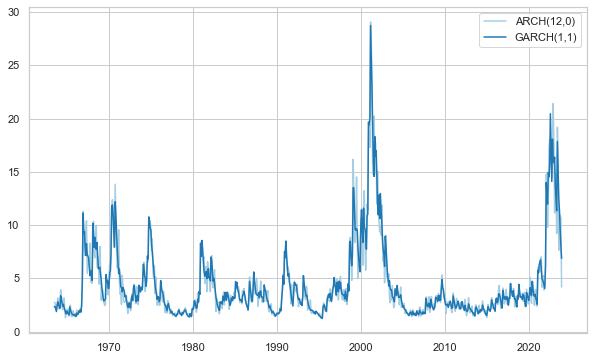

In [8]:
sns.set(style='whitegrid',palette="Paired")
plt.figure(figsize=(10,6))
plt.plot(mdata["Date"],m2.conditional_volatility ** 2,label ='ARCH(12,0)')
plt.plot(mdata["Date"],m3.conditional_volatility ** 2,label ='GARCH(1,1)')
plt.legend()
plt.show()

Based on the ARCH(12) and GARCH(1,1) model results for the residuals from the ARMA(1,1), the estimated variance processes exhibit characteristics that can be associated with stationarity in variance modeling. Specifically, the GARCH(1,1) model, with parameters alpha[1] = 0.1548 and beta[1] = 0.8124, implies a sum less than one (alpha[1] + beta[1] < 1), a common condition for the stationarity of the GARCH process. This suggests that the conditional variance is expected to revert to a long-term average over time, indicating a stationary process. Similarly, while the ARCH(12) model does not directly offer a simple criterion like the GARCH model for assessing stationarity, the presence of significant alpha terms across different lags with a robust omega coefficient supports the notion of a variance process that adjusts over time, although the assessment of stationarity might be more complex due to the model's structure. Therefore, within the confines of these models and based on the provided coefficients, the variance processes are implied to be stationary, adhering to the conditions required for stationarity in their respective model frameworks.

#### 3)
Plot the absolute values of the normalized residuals, $\eta_t = \varepsilon_t/\sigma_t$, for each model on two separate plots. Using eyeball econometrics, do the models do a good job of accounting for clustering of volatility? Plot the autocorrelation functions of $|\eta_t|$.

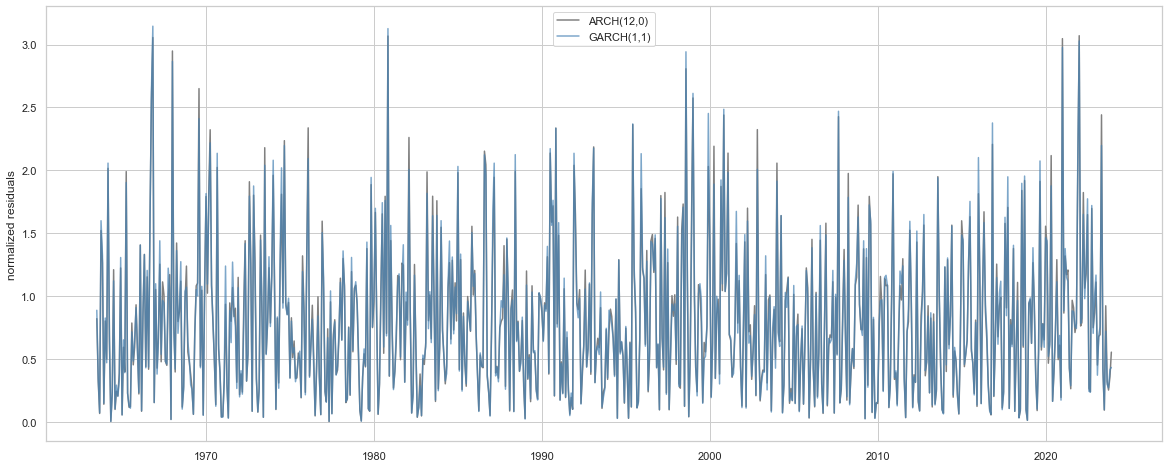

In [9]:
plt.figure(figsize=(20,8))
plt.plot(mdata["Date"],abs(m2.resid / m2.conditional_volatility),label ='ARCH(12,0)',color = 'grey')
plt.plot(mdata["Date"],abs(m3.resid / m3.conditional_volatility),label ='GARCH(1,1)',color = 'steelblue', alpha=0.7)
plt.ylabel('normalized residuals')
plt.legend()
plt.show()

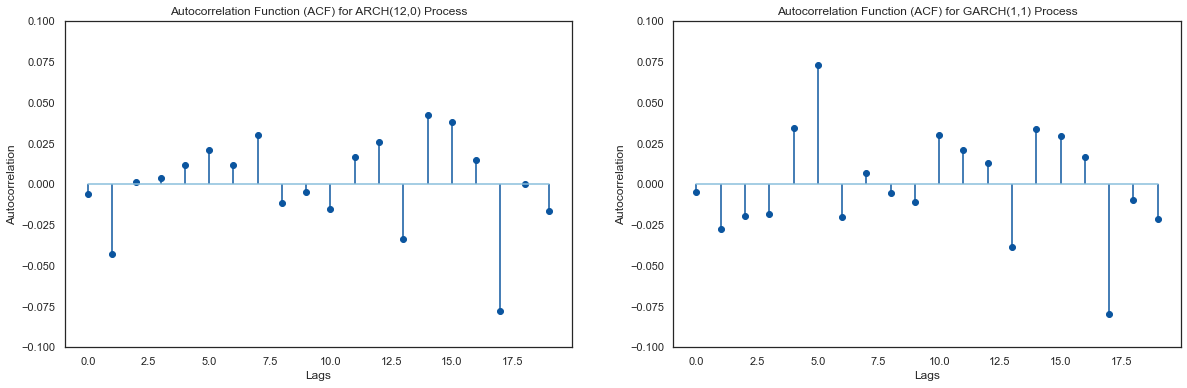

In [10]:
sns.set(style='white',palette="Blues_r")
lags = 20
acf_values_1 = acf(abs(m2.resid / m2.conditional_volatility), nlags=lags)
acf_values_2 = acf(abs(m3.resid / m3.conditional_volatility), nlags=lags)
# Plot ACF
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.ylim(bottom=-0.1, top=0.1)
plt.stem(range(lags), acf_values_1[1:])
plt.title("Autocorrelation Function (ACF) for ARCH(12,0) Process")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")

plt.subplot(1,2,2)
plt.stem(range(lags), acf_values_2[1:])
plt.ylim(bottom=-0.1, top=0.1)
plt.title("Autocorrelation Function (ACF) for GARCH(1,1) Process")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")

plt.show()

The plot of absolute values of normalized residuals suggests that both ARCH(12,0) and GARCH(1,1) models have not fully captured the volatility clustering in the financial data, as indicated by visible clusters. Similarly, the autocorrelation functions (ACFs) of the absolute normalized residuals show spikes outside the confidence bands, implying remaining autocorrelation and potential inadequacy in the models' ability to account for volatility patterns.

#### 4）
Using the daily data on CMA, estimate monthly realized variance for month t as $$RV_t = \sum_{d=1}^{N_t}r^2_{t,d},$$ where $r^2_{t,d}$ is the squared return of day $d$ in month $t$ and where $N_t$ is the number of days in month $t$. Plot the resulting monthly time series of $RV_t$.

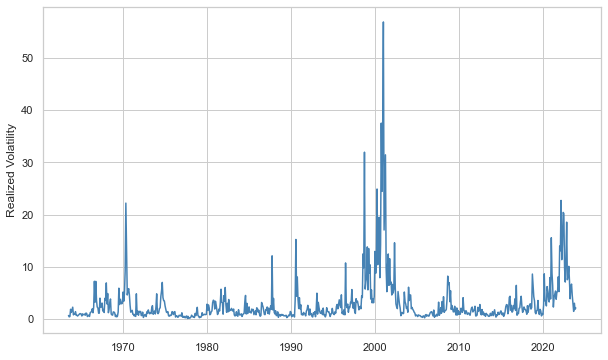

In [11]:

ddata["ym"] = ddata["Date"].dt.to_period('M')
ymdata = ddata.groupby("ym").agg(RV=("CMA", lambda x: (x**2).sum())).reset_index()
sns.set(style='whitegrid',palette="Paired")
plt.figure(figsize=(10,6))
plt.plot(ymdata["ym"].dt.to_timestamp(),ymdata['RV'],color='steelblue')
plt.ylabel('Realized Volatility')
plt.show()

#### 5)
What are the first order autocorrelations of $RV_t$ and $\varepsilon_t^2$? What is the correlation
between $RV_t$ and $\varepsilon_t^2$? What is the correlation between $RV_t$ and $\sigma_t^2$ from the GARCH
model? What is the correlation between $\varepsilon_t^2$ and $\sigma_t^2$ from the GARCH model? Given
this, you should conclude that $RV$ is a much better estimate than $\varepsilon^2$ of the true variance.

In [12]:
acf_rv = acf(ymdata["RV"], fft=False)[1]
acf_m3_resid_squared = acf(m3.resid**2, fft=False)[1]
acf_m3_sigma_squared = acf(m3.conditional_volatility**2, fft=False)[1]

cor_rv_m3_resid = np.corrcoef(ymdata["RV"], m3.resid**2)[0, 1]
cor_rv_m3_sigma = np.corrcoef(ymdata["RV"], m3.conditional_volatility**2)[0, 1]
cor_m3_resid_m3_sigma = np.corrcoef(m3.resid**2, m3.conditional_volatility**2)[0, 1]

print("ACF RV:", np.round(acf_rv,4))
print("ACF m3_resid_squared:", np.round(acf_m3_resid_squared,4))
print("ACF m3_sigma_squared:", np.round(acf_m3_sigma_squared,4))

print("Correlation RV and m3_resid_squared:", np.round(cor_rv_m3_resid,4))
print("Correlation RV and m3_sigma_squared:", np.round(cor_rv_m3_sigma,4))
print("Correlation m3_resid_squared and m3_sigma_squared:", np.round(cor_m3_resid_m3_sigma,4))

ACF RV: 0.7052
ACF m3_resid_squared: 0.2495
ACF m3_sigma_squared: 0.9478
Correlation RV and m3_resid_squared: 0.5049
Correlation RV and m3_sigma_squared: 0.6463
Correlation m3_resid_squared and m3_sigma_squared: 0.3933


Given the data, it's clear that Realized Volatility (RV) is a superior estimate of true variance compared to squared residuals. This conclusion is supported by the higher first order autocorrelation of RV (0.7052) compared to (0.2495), indicating that RV is more consistent over time. Additionally, RV's correlations with both squared residuals and the GARCH model's variance are significantly higher than the correlation between and, reinforcing RV's closer relationship with the true variance.

#### 6)
Run an ARMA(1,1) on $RV_t$ assuming normally distributed errors (which strictly speaking can’t be correct). Report the results. Let $v_t = E_{t-1}[RV_t]$ where the expectation is obtained from the estimated ARMA. What is the correlation between $v_t$ and $RV_t$? Compare this to the correlation between $\sigma_t^2$ (from the GARCH model) and $RV_t$. You should conclude from this that the ARMA(1,1) based on RV is a better forecasting model for future variance than the GARCH model, which is based on $\varepsilon^2$, is. Plot on the same graph the time series of $v_t$ and $\sigma_t^2$ from the GARCH.

In [13]:
m4 = ARIMA(np.array(ymdata["RV"]), order=(1, 0, 1)).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  726
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1835.100
Date:                Sun, 25 Feb 2024   AIC                           3678.200
Time:                        17:21:39   BIC                           3696.550
Sample:                             0   HQIC                          3685.282
                                - 726                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9660      1.256      2.361      0.018       0.504       5.429
ar.L1          0.9261      0.009    108.459      0.000       0.909       0.943
ma.L1         -0.4989      0.017    -29.209      0.000      -0.532      -0.465
sigma2         9.1717      0.137     66.812      0.000       8.903       9.441
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):             35700.03
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                             3.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
cor = np.corrcoef(m4.predict(start=0, end=len(ymdata)-1, dynamic=False), m3.conditional_volatility ** 2)[0,1]
print('The correlation is', np.round(cor,4))

The correlation is 0.8184


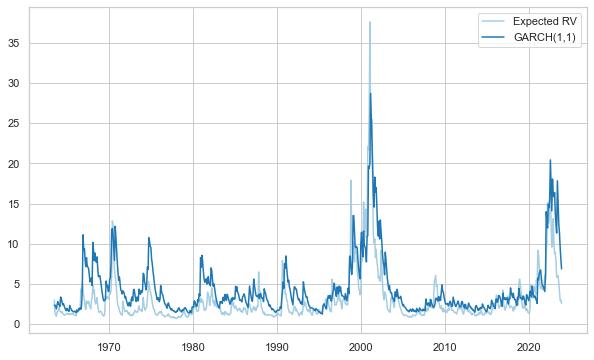

In [15]:
sns.set(style='whitegrid',palette="Paired")
plt.figure(figsize=(10,6))
plt.plot(mdata["Date"],m4.predict(start=0, end=len(ymdata)-1, dynamic=False),label ='Expected RV')
plt.plot(mdata["Date"],m3.conditional_volatility ** 2,label ='GARCH(1,1)')
plt.legend()
plt.show()

Comparing the correlation of \(v_t\) (the expectation of \(RV_t\) from the ARMA(1,1) model) with \(RV_t\), which is 0.8184, to the correlation between \(\sigma_t^2\) (from the GARCH model) and \(RV_t\), it's evident that the ARMA-based forecast of future variance demonstrates a stronger relationship with actual realized volatility. This suggests that the ARMA(1,1) model, utilizing realized volatility (\(RV\)), provides a more accurate and reliable forecast of future variance than the GARCH model, which relies on squared residuals (\(\varepsilon^2\)). Hence, for forecasting purposes, the ARMA model based on \(RV\) is superior.
